In [31]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt

In [7]:
import pandas as pd

# Read the sentence.csv file into a pandas dataframe
df = pd.read_csv('newsentences.csv', encoding='iso-8859-1')
#df= df.rename(columns={'0': 'text'})
# Print the first 10 rows of the dataframe
print(df.sample(10))

                                             Sentences
336  Gone Horribly Right: The opening narration for...
688  When she brings the matter to her husband, he ...
183  House Hightower's position in the realm (by vi...
380  A brilliant and dashing noble who loses a part...
308       Reversed for Viserys' sons Aegon and Aemond.
730  Like Viserys with Aemma, Daemon is left heartb...
435  She also adopts Daemon's two daughters from hi...
415  Only thing is, Alicent completely ignores ther...
745  We have Larys Strong and Littlefinger (Petyr B...
599  Larys could've tried to find someone who's act...


In [9]:
df.head(10)

,Sentences
0,Actually Pretty Funny: Daemon attempts to disr...
1,"Daemon: ""Hah!"
2,"Very good."""
3,Adaptation Distillation: .
4,Adaptation Dye-Job: .
5,Adaptation Expansion: The first season of the ...
6,"The chapters in question are: ""Heirs of the Dr..."
7,"In practice, Season 1 skips the previous gener..."
8,"""The Dying of the Dragons: The Blacks and the ..."
9,"The first half of ""The Dying of the Dragons: A..."


In [10]:
df2.size

NameError: name 'df2' is not defined

In [12]:
def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df.sample(20))

display_text_max_col_width(df["Sentences"], 800)

150                                                                                                                                                                                                                                                   Costume Porn: The dresses, robes, and tunics of the nobles look absolutely gorgeous, laced with gold and jewels.
534                                                                             Quantity vs. Quality: When war seems to be imminent between the Blacks and the Greens, Daemon is confident that the Blacks will win, as they have seven dragons with riders, with six additional riderless dragons they can try to tame, while the Greens have less than half of that.
188                                                                                                                                                                                                           It's not immediate as the Targaryens are still powerful at the start of the 

In [13]:
df=df.dropna()

In [14]:
df.size

918

In [15]:
def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df.sample(20))

display_text_max_col_width(df["Sentences"], 800)

432                                                                                                                                                                                                                     Expecting a dragon attack from above, they get lured into leaving the caves when no dragon appears.
622                                                                                                                                                                                           When Viserys wants to have sex with his wife in the middle of the night, servants have to be called to summon her to his bed.
343                                                                                                                                                                              Grey-and-Gray Morality: The conflict between Rhaenyra, Alicent, and their respective supporters grants neither side the moral high ground.
444                                                 

In [18]:
!python -m spacy download en_core_web_sm


     --------------------------------------- 13.7/13.7 MB 24.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
import spacy
import csv
import pandas as pd

nlp = spacy.load('en_core_web_sm')

entities_list = []

with open('newsentences.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader) # skip the header row
    for row in reader:
        doc = nlp(row[0])
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        entities_list.extend(entities)

df = pd.DataFrame(entities_list, columns=['Entity', 'Label'])

print(df.head())



             Entity        Label
0      Criston Cole       PERSON
1              Cole      PRODUCT
2         Apologies  WORK_OF_ART
3  The first season         DATE
4      Fire & Blood          ORG


In [21]:
df.sample(10)

,Entity,Label
1406,the first half of Season 1,DATE
204,Rhaenyra,ORG
883,Rhaegar,ORG
893,Aegon,ORG
892,hours ago,TIME
1256,seventh,ORDINAL
1400,Aemond,ORG
466,Lucerys,PERSON
504,Velaryons,PERSON
323,Alicent Hightower,PERSON


In [22]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [25]:
from tqdm import tqdm

In [26]:
entity_pairs = []
df1 = pd.read_csv('newsentences.csv', encoding='iso-8859-1')
for i in tqdm(df1["Sentences"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 918/918 [00:09<00:00, 101.81it/s]


In [27]:
entity_pairs[10:20]

[['who', '\x97 House wedding'],
 ['that', 'away  accident'],
 ['own  dragon', 'him'],
 ['Laenor', 'simply  Seasmoke'],
 ['which', 'it'],
 ['Dornish these', 'Summer time'],
 ['strategically  Conqueror', 'table'],
 ['under luminescent light', 'built  dragonglass'],
 ['function', 'original  series'],
 ['Rhaenyra', '5th wedding anniversary']]

In [28]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 
  matcher.add("matching_1", [pattern], on_match = None) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [32]:
relations = [get_relation(i) for i in tqdm(df1['Sentences'])]


100%|██████████| 918/918 [00:10<00:00, 88.48it/s]


In [33]:
pd.Series(relations).value_counts()[:50]

is               94
's               26
are              24
have             19
has              11
be               10
marries           9
tells             9
was               8
becomes           8
see               7
seems             7
ends              7
named             6
pass between      6
kills             6
said              6
proposes          6
betrothed to      6
become            5
wears             5
stated            5
lacks             4
takes             4
downplayed        4
rejects           4
confronts         4
passed            4
sends             4
Look              4
chooses           4
makes             4
given             4
means             3
knows             3
Rhaenyra          3
set               3
intercut with     3
sees              3
begins            3
shows             3
Downplayed        3
thinks            3
Daemon            3
loves             3
tries             3
made              3
called            3
notice            3
tried             3


In [34]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [35]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

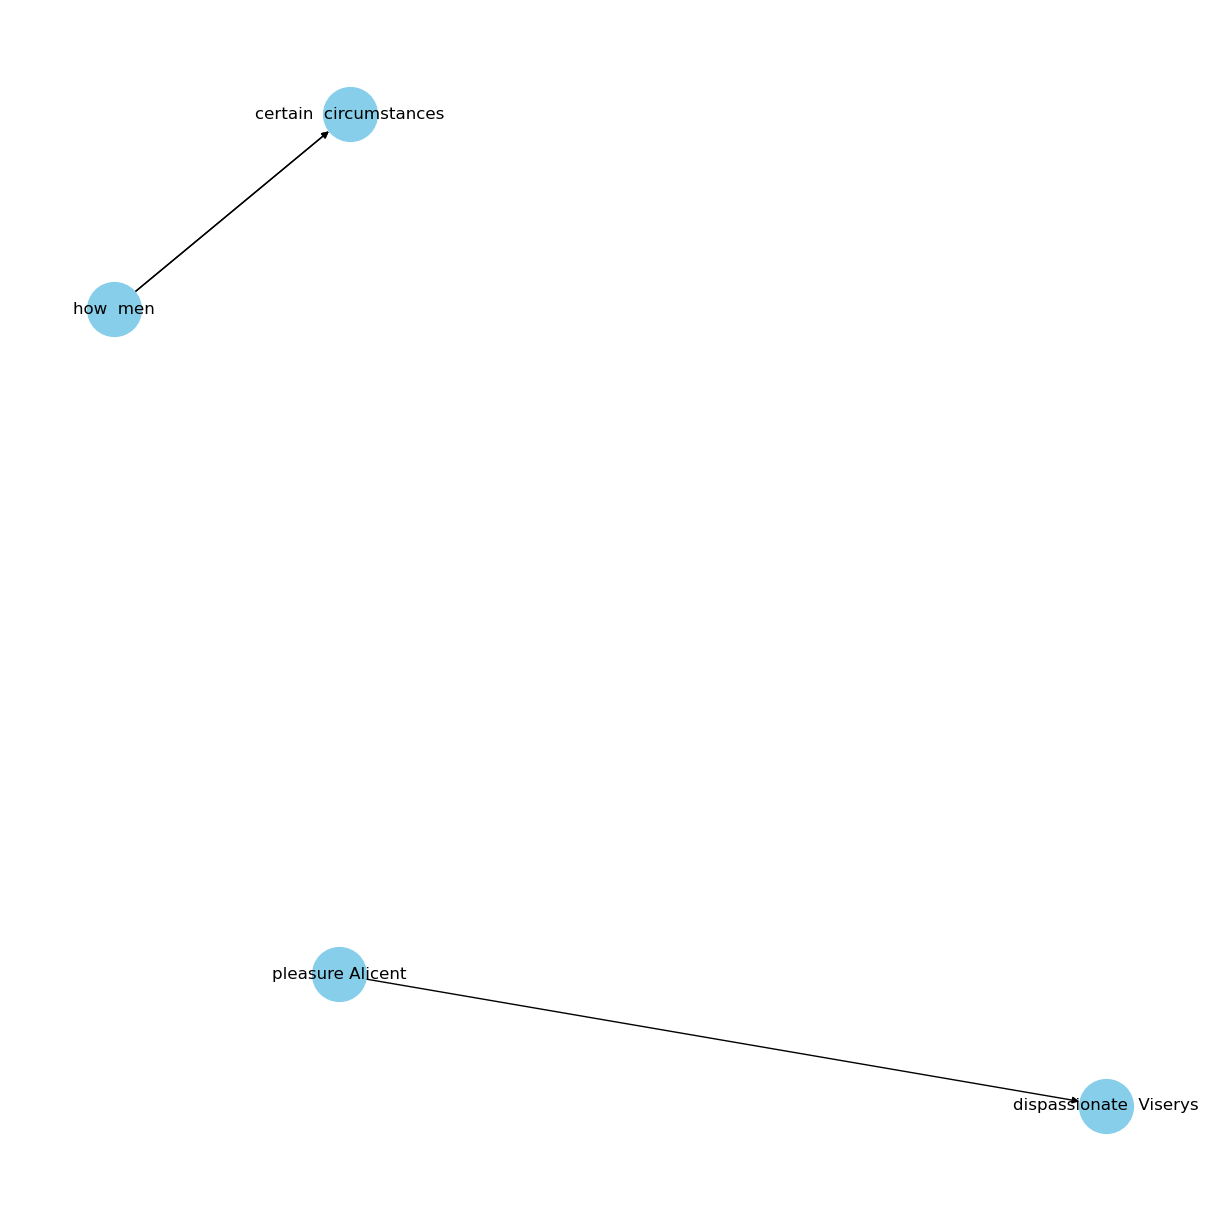

In [36]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="intercut with"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

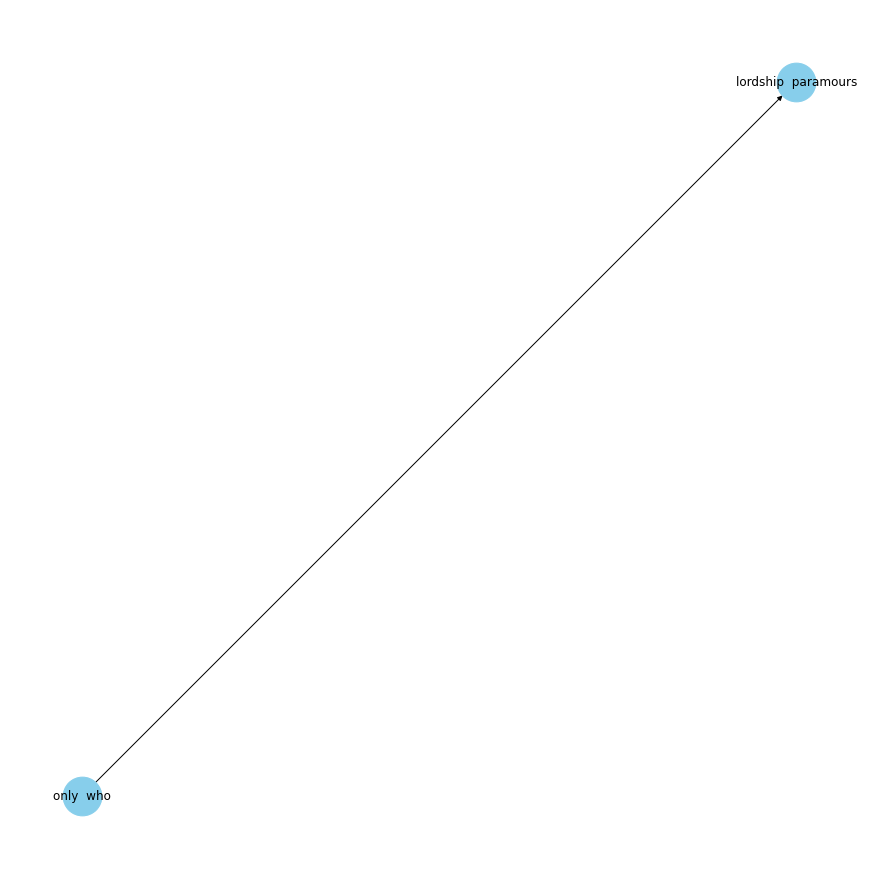

In [58]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

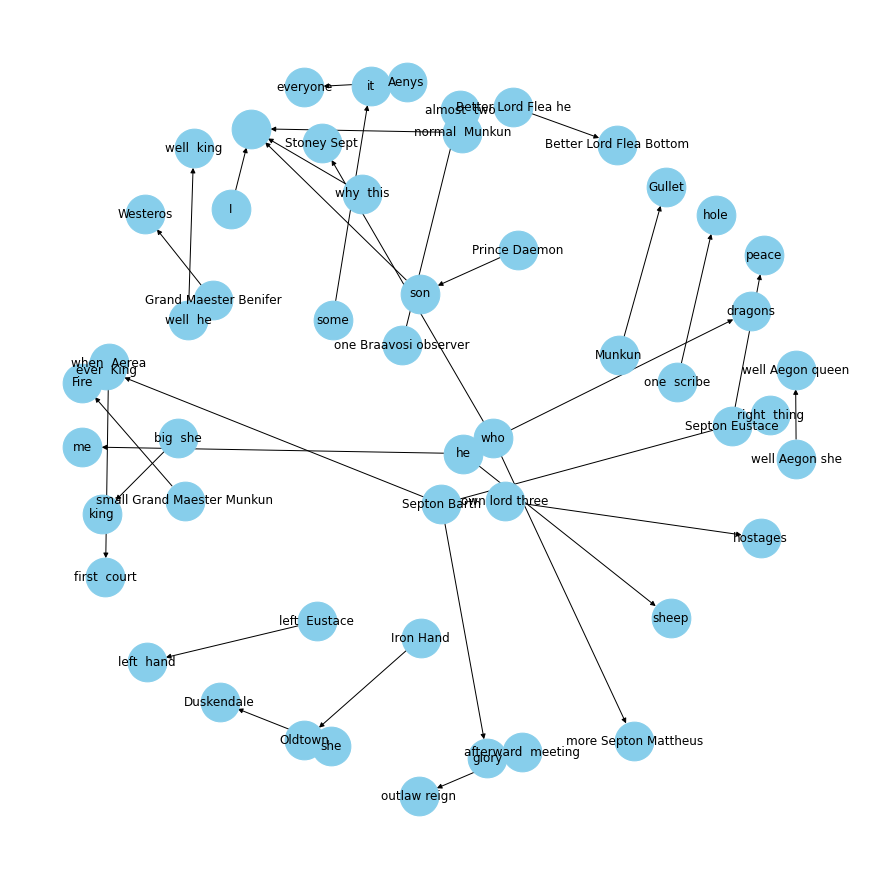

In [60]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="wrote"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()